In [58]:
import networkx as nx
import math
from matplotlib import pyplot as plt
import numpy as np

# Coauthorship Network Analysis

In problem you will analyze a real social network representing the coauthorships of scientists working on network theory and experiment. First, read the data
from the `netscience.gml` file.

In [4]:
# Read the graph.
G = nx.read_gml("netscience.gml")

Extract the giant component and create an unweighted graph.

In [9]:
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

Use Gephi to visualize the graph.

Compute the following statistics:
- average path length (report it)
- average clustering coefficient (report it)
- degree distribution (plot it using linear axis and the log-log scale)

[Text(0.5, 0, 'Degree'), Text(0, 0.5, 'Count')]

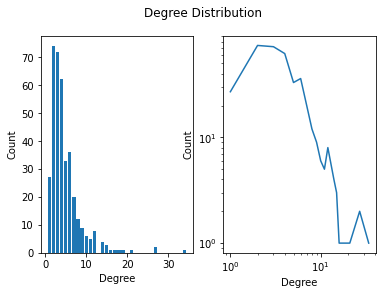

In [38]:
# Average path length
p_len = nx.average_shortest_path_length(G)

# Average clustering coefficient
cluster_coef = nx.average_clustering(G)

# Degree distribution
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Degree Distribution')
ax1.bar(*np.unique(degree_sequence, return_counts=True))
ax1.set(xlabel = "Degree", ylabel="Count")

ax2.loglog(*np.unique(degree_sequence, return_counts=True))
ax2.set(xlabel = "Degree", ylabel="Count")

Construct graphs from the following network models using the indicated parameters and compute the above statistics for each one of them:
- ER-random graph (use G(n, m) with n = 379 and m is the number of edges in G
- Configuration model (n = 379 and degree sequence as computed in part (b))
- BA-graph with $n_0 = 10, p_0 = 0.6$ and $m_0 = d/2$ 

In [61]:
# Erdos-Renyi
er = nx.gnm_random_graph(n = 379, m = G.number_of_edges())

# Configuration
conf = nx.configuration_model(degree_sequence)

# Barabasi-Albert
initial = nx.gnp_random_graph(n = 10, p = 0.6)
d = math.floor(sum([v[1] for _,v in enumerate(G.degree())])/len(G.nodes())/2)
ba = nx.barabasi_albert_graph(n = 379, m = d, initial_graph = initial)


Report average path length and average clustering coefficient (for the real social network as computed in (b) and all models as computed in (c)) in a table and compare them. Include both versions for the plots of the degree distributions for all models and the real data – try to put them all one one page for easier comparison. Which model models G best for which statistics? Argue whether there is a clear "best" model that represents the coauthorship network most accurately

In [74]:
print("Graph \t\t\t Average Path Length \t Average Clustering Coefficient")
for graph, name in [(er, "Erdos-Renyi"), (conf, "Configuration"), (ba, "Barabasi-Albert")]:
    if nx.is_connected(graph):
        p = nx.average_shortest_path_length(graph)
        coef = nx.average_clustering(graph)
        print(f"{name} \t {p} \t {coef}")
    else:
        lcc = max(nx.connected_components(graph), key=len)
        sub_g = graph.subgraph(lcc).copy()
        if name == "Configuration":
            sub_g = nx.Graph(sub_g)
            sub_g.remove_edges_from(nx.selfloop_edges(sub_g))
        p = nx.average_shortest_path_length(sub_g)
        coef = nx.average_clustering(sub_g)
        print(f"{name} \t\t {p} \t {coef}")

Graph 			 Average Path Length 	 Average Clustering Coefficient
Erdos-Renyi 		 3.9464981093741183 	 0.01110460420805248
Configuration 		 3.756123370393363 	 0.017848784903197606
Barabasi-Albert 	 3.6403093632645085 	 0.03344414937499554


Using the qualities and properties of the respective network models, reason about the following social network phenomena being or not being present in the coauthorship network:
- small-world phenomenon
- hubs
- rich-get-richer phenomenon
- local structure

Clearly indicate which network model and model property you use to come to your conclusion about each of the above phenomena. Further, incorporate your visualization from (a) into your reasoning as additional (not exclusive) source for explanations.